# Navigating Short Stories

In this notebook, we explain how to use Mappa Mundi (MM) to do causal DEFT (DAG extraction from text)
using as a test case, the following 3 short stories by P.G. Wodehouse.

* [Bill the Bloodhound](../short_stories/bill-the-bloodhound.txt)
* [Extricating Young Gussie](../short_stories/extricating-young-gussie.txt)
* [Wilton's Holiday](../short_stories/wiltons-holiday.txt)


In [1]:
# set this to True if running on Google Colab
COLAB = True

In [2]:
# this is necessary iff running on Colab for first time
if COLAB:
    !git clone https://github.com/rrtucci/mappa_mundi.git
    %cd mappa_mundi/
    !pip install -r requirements.txt

Cloning into 'mappa_mundi'...
remote: Enumerating objects: 785, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 785 (delta 3), reused 7 (delta 3), pack-reused 774
Receiving objects: 100% (785/785), 6.09 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (500/500), done.
/content/mappa_mundi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# this makes sure it starts looking for things from the project folder down.

import os
import sys
if not COLAB:
    os.chdir('../')
else:
    os.chdir('/content/mappa_mundi')
    # kaggle
    # os.chdir('/kaggle/working/mappa_mundi')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/content/mappa_mundi


In [4]:
from utils import *
print_welcome_message()

Welcome Causal AI Navigator. We have been waiting for you for millennia. Where would you like us to go next?


## Global variables
All the global variables used by Mappa Mundi are defined in this file.
Change with caution.


[my_globals.py](../my_globals.py)

## Originals

Here is the original form of the 3 short stories, in the form they were downloaded
from the Project Gutenberg website.

* [Bill the Bloodhound](../short_stories/bill-the-bloodhound.txt)
* [Extricating Young Gussie](../short_stories/extricating-young-gussie.txt)
* [Wilton's Holiday](../short_stories/wiltons-holiday.txt)

## Cleaning

The results of the following step can be found in the **short_stories_clean**
directory.


* [Bill the Bloodhound (clean)](../short_stories_clean/bill-the-bloodhound.txt)
* [Extricating Young Gussie (clean)](../short_stories_clean/extricating-young-gussie.txt)
* [Wilton's Holiday (clean)](../short_stories_clean/wiltons-holiday.txt)

In [5]:
from cleaning import *

in_dir = "short_stories"
out_dir = "short_stories_clean"
batch_file_names = ["bill-the-bloodhound.txt", "extricating-young-gussie.txt", "wiltons-holiday.txt"]
clean_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names,
    remove_dialog=False)

1.
fetching bill-the-bloodhound.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
2.
fetching extricating-young-gussie.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
3.
fetching wiltons-holiday.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []


## Spell-checking

The results of the following step can be found in the **short_stories_spell** directory

* [Bill the Bloodhound (spell)](../short_stories_spell/bill-the-bloodhound.txt)
* [Extricating Young Gussie (spell)](../short_stories_spell/extricating-young-gussie.txt)
* [Wilton's Holiday (spell)](../short_stories_spell/wiltons-holiday.txt)

In [6]:
from spell_checking import *
use_local_dict=True
error_type = "all"

print("use_local_dict=", use_local_dict)
print("error_type=", error_type)
print("SPELLING_CORRECTION_RISK=", SPELLING_CORRECTION_RISK)
print()

in_dir = "short_stories_clean"
out_dir = "short_stories_spell"
batch_file_names = my_listdir(in_dir)
correct_this_batch_of_files(in_dir,
                            out_dir,
                            batch_file_names,
                            error_type= error_type,
                            verbose=False,
                            use_local_dict=use_local_dict)

use_local_dict= True
error_type= all
SPELLING_CORRECTION_RISK= 1e-08

1.
bill-the-bloodhound.txt
all changes: [('inscrutably', 'inscrutable')]
2.
extricating-young-gussie.txt
all changes: [('kep', 'keep'), ('deepo', 'deep')]
3.
wiltons-holiday.txt
all changes: []


## Simplifying

The results of the following step can be found in the **short_stories_simp** directory

* [Bill the Bloodhound (simp)](../short_stories_simp/bill-the-bloodhound.txt)
* [Extricating Young Gussie (simp)](../short_stories_simp/extricating-young-gussie.txt)
* [Wilton's Holiday (simp)](../short_stories_simp/wiltons-holiday.txt)


In [7]:
# from simplifying import *

# in_dir = "short_stories_spell"
# out_dir = "short_stories_simp"
# batch_file_names = my_listdir(in_dir)[0:3]
# simplify_batch_of_m_scripts(
#     in_dir, out_dir,
#     batch_file_names,
#     verbose=False)

Open the following jupyter notebook in your Google Colab account and run it

https://colab.research.google.com/drive/1S2EWOGkoCgjfOJzTRJ7PLeu4T8SBwhlF?usp=sharing

Then download the resulting simplified short stories to the folder `short_stories_simp`.
We have done this for you in the Mappa_Mundi repo for 3 P.G.Wodehouse short stories.

## Post Cleaning

The results of the following step can be found in the **short_stories_post_clean** directory

* [Bill the Bloodhound (post-clean)](../short_stories_post_clean/bill-the-bloodhound.txt)
* [Extricating Young Gussie (post-clean)](../short_stories_post_clean/extricating-young-gussie.txt)
* [Wilton's Holiday (post-clean)](../short_stories_post_clean/wiltons-holiday.txt)


In [8]:
from post_cleaning import *
in_dir = "short_stories_simp"
out_dir = "short_stories_post_clean"
batch_file_names = my_listdir(in_dir)[0:3]
post_clean_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names,
    verbose=False)

1. bill-the-bloodhound.txt
2. extricating-young-gussie.txt
3. wiltons-holiday.txt


## DAG Atlas creation


The results of the following step can be found in the **short_stories_dag_atlas** directory. They are 3 pickled
files, one for each of the 3 short stories. They will be opened in the next step.

In [15]:
print(SIMI_THRESHOLD) # 2.0

2


In [9]:
from DagAtlas import *

simp_dir = "short_stories_post_clean"
dag_dir = "short_stories_dag_atlas"
atlas = DagAtlas(simp_dir, dag_dir)
all_titles = [file_name[:-len(".txt")] \
              for file_name in my_listdir(simp_dir)]
atlas.update_arrows_in_batch_of_m_scripts(
    batch_titles=all_titles[0:3])

Initiating DagAtlas object: 0.00 minutes



Starting comparison of 2 titles: 0.14 minutes
title1 and its num of nodes: bill-the-bloodhound 594
title2 and its num of nodes: extricating-young-gussie 736
product of numbers of nodes= 437184
Starting bridges: 0.14 minutes
1 bridges
2 bridges
3 bridges
4 bridges
5 bridges
6 bridges
7 bridges
8 bridges
9 bridges
10 bridges
11 bridges
12 bridges
13 bridges
14 bridges
15 bridges
16 bridges
17 bridges
18 bridges
Before saving 2 dags: 2.99 minutes
Exiting 2 titles comparison: 2.99 minutes

Starting comparison of 2 titles: 2.99 minutes
title1 and its num of nodes: bill-the-bloodhound 594
title2 and its num of nodes: wiltons-holiday 466
product of numbers of nodes= 276804
Starting bridges: 2.99 minutes
1 bridges
2 bridges
3 bridges
4 bridges
5 bridges
6 bridges
7 bridges
8 bridges
9 bridges
10 bridges
Before saving 2 dags: 4.84 minutes
Exiting 2 titles comparison: 4.84 minutes

Starting comparison of 2 titles: 4.84 minutes
title1 and its num of nodes: extricating-young-gussie 736
title2 and 

## Visualizing

In the following step, we a draw DAG for each of the 3 short stories, based on the
pickled files in the **short_stories_dag_atlas** directory.
We do this for 2 arrow repetition thresholds: 3, 4.

In [10]:
from Dag import *

def visualize_all_dags(reps_threshold, draw):

    dag_dir = "short_stories_dag_atlas"
    simp_dir = "short_stories_simp"
    clean_dir = "short_stories_clean"
    file_names = [file_name for
                  file_name in my_listdir(dag_dir)[0:3]]
    dags = []
    for fname in file_names:
        path = dag_dir + "/" + fname
        with open(path, "rb") as f:
            dag = pik.load(f)
            dags.append(dag)
    for dag in dags:
        print("-------------------------")
        print(dag.m_title)
        hreps_arrows = dag.build_high_reps_arrows(
            reps_threshold)
        print({arrow_str(arrow):dag.arrow_to_reps[arrow] \
               for arrow in hreps_arrows})
        print()
        if draw:
            dag.draw(reps_threshold, jupyter=True)
            dag.print_map_legend(clean_dir, simp_dir, reps_threshold)

-------------------------
bill-the-bloodhound
{'(13,1)->(357,0)': 4}



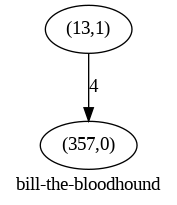

MAP LEGEND
title: bill-the-bloodhound
arrow repetitions threshold: 4
number of arrows shown: 1
number of arrows dropped: 84
(13,1):
(FULL) She was small and quiet, and rather pretty.
(PART) She was small .
(357,0):
(FULL) He clutched at her.
(PART) He clutched at her .
-------------------------
extricating-young-gussie
{'(292,0)->(511,0)': 4, '(292,0)->(529,0)': 6, '(292,1)->(529,0)': 4, '(511,0)->(529,0)': 4}



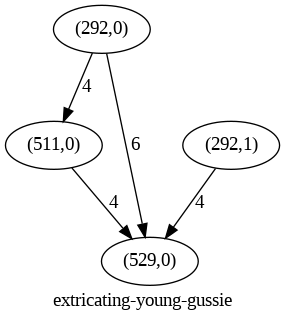

MAP LEGEND
title: extricating-young-gussie
arrow repetitions threshold: 4
number of arrows shown: 4
number of arrows dropped: 56
(292,0):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with great big eyes .
(292,1):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with a ripping smile .
(511,0):
(FULL) she said.
(PART) she said .
(529,0):
(FULL) 'He was sitting hand in hand with her.'
(PART) ' He was sitting hand in hand with her '
-------------------------
wiltons-holiday
{'(49,0)->(266,1)': 5}



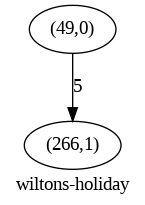

MAP LEGEND
title: wiltons-holiday
arrow repetitions threshold: 4
number of arrows shown: 1
number of arrows dropped: 41
(49,0):
(FULL) She was small and, to my mind, insignificant.
(PART) She was small .
(266,1):
(FULL) She came to him as a little child comes to its mother, and he put his arm around her.
(PART) he put his arm around her .


In [11]:
visualize_all_dags(reps_threshold=4, draw=True)

-------------------------
bill-the-bloodhound
{'(13,1)->(357,0)': 4}



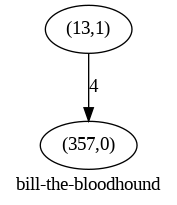

MAP LEGEND
title: bill-the-bloodhound
arrow repetitions threshold: 3
number of arrows shown: 1
number of arrows dropped: 84
(13,1):
(FULL) She was small and quiet, and rather pretty.
(PART) She was small .
(357,0):
(FULL) He clutched at her.
(PART) He clutched at her .
-------------------------
extricating-young-gussie
{'(292,0)->(511,0)': 4, '(292,0)->(529,0)': 6, '(292,1)->(529,0)': 4, '(511,0)->(529,0)': 4}



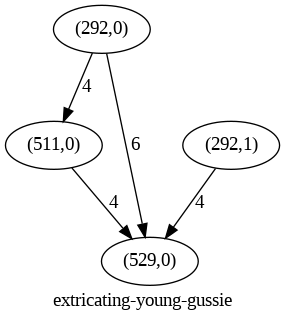

MAP LEGEND
title: extricating-young-gussie
arrow repetitions threshold: 3
number of arrows shown: 4
number of arrows dropped: 56
(292,0):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with great big eyes .
(292,1):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with a ripping smile .
(511,0):
(FULL) she said.
(PART) she said .
(529,0):
(FULL) 'He was sitting hand in hand with her.'
(PART) ' He was sitting hand in hand with her '
-------------------------
wiltons-holiday
{'(49,0)->(266,1)': 5}



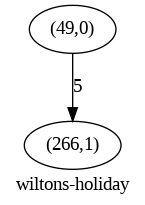

MAP LEGEND
title: wiltons-holiday
arrow repetitions threshold: 3
number of arrows shown: 1
number of arrows dropped: 41
(49,0):
(FULL) She was small and, to my mind, insignificant.
(PART) She was small .
(266,1):
(FULL) She came to him as a little child comes to its mother, and he put his arm around her.
(PART) he put his arm around her .


In [12]:
visualize_all_dags(reps_threshold=3, draw=True)

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
%%bash
zip -r short_stories_dag_atlas.zip short_stories_dag_atlas

  adding: short_stories_dag_atlas/ (stored 0%)
  adding: short_stories_dag_atlas/extricating-young-gussie.pkl (deflated 85%)
  adding: short_stories_dag_atlas/wiltons-holiday.pkl (deflated 84%)
  adding: short_stories_dag_atlas/bill-the-bloodhound.pkl (deflated 84%)
